In [2]:
import pandas as pd
import numpy as np
import evaluate
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Analysis of Extractive Text Summarization

### Distribution of individual ROGUE scores - Box Plot Visualization

In [3]:
df = pd.read_csv('./output/ext-ts-final.csv')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,id,highlights,article,baseline-ext,bert-base-ext-zs,t5-small-ext-zs,gpt-3.5-ext-zs,gpt-4-ext-zs,bert-base-ext-ft,gpt35-ext-ft,gpt40-ext-ft
0,0,0,92c514c913c0bdfe25341af9fd72b29db544099b,Experts question if packed out planes are put...,Ever noticed how plane seats appear to be gett...,Ever noticed how plane seats appear to be gett...,Ever noticed how plane seats appear to be gett...,some experts are questioning if shrinking spac...,Experts are concerned that the shrinking space...,Experts argue that the diminishing space on pl...,the dot and faa are happy to set standards for...,Experts are questioning if having such packed ...,```\nEver noticed how plane seats appear to be...
1,1,1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,Drunk teenage boy climbed into lion enclosure ...,A drunk teenage boy had to be rescued by secur...,A drunk teenage boy had to be rescued by secur...,A drunk teenage boy had to be rescued by secur...,Rahul Kumar 17 climbed into the enclosure fenc...,NaN,Intoxicated 17-year-old Rahul Kumar jumped int...,rahul kumar 17 climbed into the enclosure fenc...,NaN,NaN


In [4]:
df = df.dropna(how='any',axis=0) 
df = df.fillna('')
df.to_csv('./output/ext-ts-boxplot-summaries.csv')
df.head(3)

,Unnamed: 0.1,Unnamed: 0,id,highlights,article,baseline-ext,bert-base-ext-zs,t5-small-ext-zs,gpt-3.5-ext-zs,gpt-4-ext-zs,bert-base-ext-ft,gpt35-ext-ft,gpt40-ext-ft
0,0,0,92c514c913c0bdfe25341af9fd72b29db544099b,Experts question if packed out planes are put...,Ever noticed how plane seats appear to be gett...,Ever noticed how plane seats appear to be gett...,Ever noticed how plane seats appear to be gett...,some experts are questioning if shrinking spac...,Experts are concerned that the shrinking space...,Experts argue that the diminishing space on pl...,the dot and faa are happy to set standards for...,Experts are questioning if having such packed ...,```\nEver noticed how plane seats appear to be...
2,2,2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Nottingham Forest are close to extending Dougi...,Dougie Freedman is on the verge of agreeing a ...,Dougie Freedman is on the verge of agreeing a ...,Dougie Freedman is on the verge of agreeing a ...,Dougie Freedman is set to sign a new two year ...,Dougie Freedman is close to agreeing to a new ...,Dougie Freedman is poised to sign a new two-ye...,dougie freedman is set to sign a new two year ...,"Nottingham Forest's manager, Dougie Freedman, ...",```\nDougie Freedman is on the verge of agreei...
3,3,3,caabf9cbdf96eb1410295a673e953d304391bfbb,Fiorentina goalkeeper Neto has been linked wit...,Liverpool target Neto is also wanted by PSG an...,Liverpool target Neto is also wanted by PSG an...,Liverpool target Neto is also wanted by PSG an...,neto is wanted by a number of top european clu...,"Fiorentina goalkeeper Neto, who has been linke...","Liverpool are interested in signing Neto, the ...",liverpool and psg were linked with a move for ...,Liverpool face competition from PSG and Spanis...,```\nLiverpool target Neto is also wanted by P...


In [5]:
import evaluate
rouge = evaluate.load('rouge')

In [6]:
df = df.reset_index()  # make sure indexes pair with number of rows

In [7]:
mdf = pd.DataFrame()
models = ['baseline-ext','bert-base-ext-zs', 't5-small-ext-zs', 'gpt-3.5-ext-zs', 'gpt-4-ext-zs', 
          'bert-base-ext-ft', 'gpt35-ext-ft', 'gpt40-ext-ft']
for model in models:
    metrics = []
    for index, row in df.iterrows():
        preds = row[model]
        ref = row['highlights']
        rogue_score = rouge.compute(predictions=[preds], references=[ref])
        metrics.append(rogue_score)

    temp_df = pd.DataFrame(metrics)
    temp_df.drop('rougeLsum' , axis=1, inplace = True)
    temp_df.rename(columns = {'rouge1': model + '-' + 'R1', 
                              'rouge2': model + '-' + 'R2', 
                              "rougeL": model + '-' + 'RL'}, inplace = True) 
    mdf = pd.concat([mdf, temp_df], axis=1)
    print(model)

baseline-ext
bert-base-ext-zs
t5-small-ext-zs
gpt-3.5-ext-zs
gpt-4-ext-zs
bert-base-ext-ft
gpt35-ext-ft
gpt40-ext-ft


In [8]:
mdf.to_csv('./output/ext-ts-boxplot-data.csv')
mdf.head(5)


,baseline-ext-R1,baseline-ext-R2,baseline-ext-RL,bert-base-ext-zs-R1,bert-base-ext-zs-R2,bert-base-ext-zs-RL,t5-small-ext-zs-R1,t5-small-ext-zs-R2,t5-small-ext-zs-RL,gpt-3.5-ext-zs-R1,...,gpt-4-ext-zs-RL,bert-base-ext-ft-R1,bert-base-ext-ft-R2,bert-base-ext-ft-RL,gpt35-ext-ft-R1,gpt35-ext-ft-R2,gpt35-ext-ft-RL,gpt40-ext-ft-R1,gpt40-ext-ft-R2,gpt40-ext-ft-RL
0,0.250000,0.105263,0.187500,0.307692,0.125000,0.230769,0.272727,0.069767,0.204545,0.251656,...,0.194805,0.173913,0.044444,0.152174,0.454545,0.232558,0.363636,0.359551,0.114943,0.247191
1,0.336000,0.113821,0.192000,0.277778,0.057143,0.166667,0.422535,0.144928,0.253521,0.451613,...,0.258065,0.500000,0.186047,0.295455,0.578313,0.246914,0.361446,0.414634,0.125000,0.243902
2,0.333333,0.162500,0.197531,0.365217,0.123894,0.226087,0.463415,0.225000,0.268293,0.373984,...,0.152672,0.555556,0.318182,0.333333,0.449438,0.160920,0.224719,0.488372,0.190476,0.325581
3,0.463277,0.251429,0.384181,0.330435,0.166667,0.226087,0.440367,0.149533,0.238532,0.515337,...,0.250000,0.458015,0.248062,0.335878,0.526316,0.375000,0.421053,0.500000,0.298246,0.379310
4,0.410959,0.166667,0.246575,0.358209,0.151515,0.208955,0.418605,0.071429,0.255814,0.402878,...,0.184049,0.382979,0.108696,0.212766,0.428571,0.083333,0.224490,0.494845,0.189474,0.226804


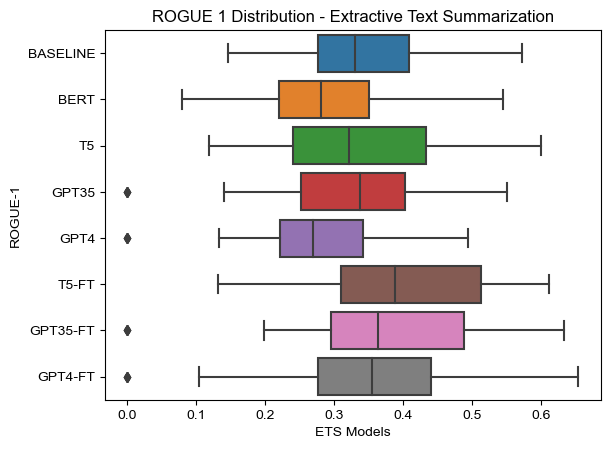

In [9]:
cols = ['baseline-ext-R1','bert-base-ext-zs-R1', 't5-small-ext-zs-R1', 'gpt-3.5-ext-zs-R1', 'gpt-4-ext-zs-R1', 
        'bert-base-ext-ft-R1', 'gpt35-ext-ft-R1', 'gpt40-ext-ft-R1']
rouge1 = mdf[cols]
rouge1.rename(columns={
                'baseline-ext-R1': 'BASELINE', 
                'bert-base-ext-zs-R1': 'BERT', 
                't5-small-ext-zs-R1': 'T5', 
                'gpt-3.5-ext-zs-R1': 'GPT35', 
                'gpt-4-ext-zs-R1': 'GPT4', 
                'bert-base-ext-ft-R1': 'T5-FT', 
                'gpt35-ext-ft-R1': 'GPT35-FT', 
                'gpt40-ext-ft-R1': 'GPT4-FT'}, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rouge1), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ETS Models',fontsize=10)
plt.ylabel('ROGUE-1',fontsize=10)
plt.title('ROGUE 1 Distribution - Extractive Text Summarization', fontsize=12)
plt.show()

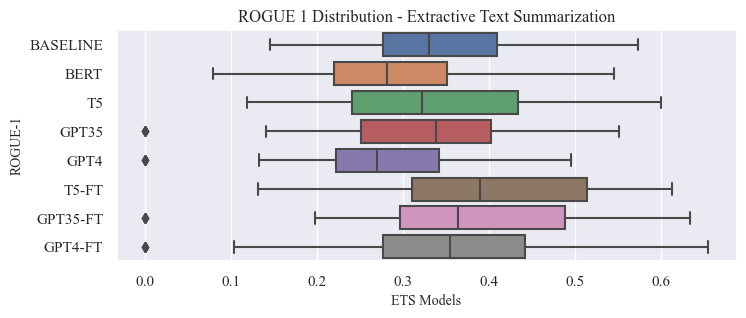

In [10]:
cols = ['baseline-ext-R1','bert-base-ext-zs-R1', 't5-small-ext-zs-R1', 'gpt-3.5-ext-zs-R1', 
        'gpt-4-ext-zs-R1', 'bert-base-ext-ft-R1', 'gpt35-ext-ft-R1', 'gpt40-ext-ft-R1']



rouge1 = mdf[cols]
rouge1.rename(columns={
                'baseline-ext-R1': 'BASELINE', 
                'bert-base-ext-zs-R1': 'BERT', 
                't5-small-ext-zs-R1': 'T5', 
                'gpt-3.5-ext-zs-R1': 'GPT35', 
                'gpt-4-ext-zs-R1': 'GPT4', 
                'bert-base-ext-ft-R1': 'T5-FT', 
                'gpt35-ext-ft-R1': 'GPT35-FT', 
                'gpt40-ext-ft-R1': 'GPT4-FT'}, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rouge1), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ETS Models',fontsize=10)
plt.ylabel('ROGUE-1',fontsize=10)
plt.title('ROGUE 1 Distribution - Extractive Text Summarization', fontsize=12)
plt.show()

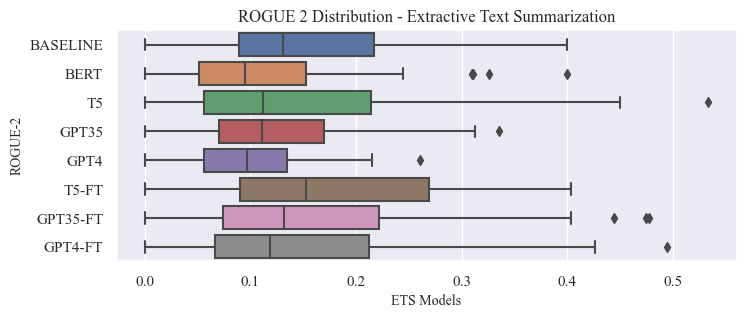

In [11]:
cols = ['baseline-ext-R2','bert-base-ext-zs-R2', 't5-small-ext-zs-R2', 'gpt-3.5-ext-zs-R2', 
        'gpt-4-ext-zs-R2', 'bert-base-ext-ft-R2', 'gpt35-ext-ft-R2', 'gpt40-ext-ft-R2']
rouge2 = mdf[cols]
rouge2.rename(columns={
                'baseline-ext-R2': 'BASELINE', 
                'bert-base-ext-zs-R2': 'BERT', 
                't5-small-ext-zs-R2': 'T5', 
                'gpt-3.5-ext-zs-R2': 'GPT35', 
                'gpt-4-ext-zs-R2': 'GPT4', 
                'bert-base-ext-ft-R2': 'T5-FT', 
                'gpt35-ext-ft-R2': 'GPT35-FT', 
                'gpt40-ext-ft-R2': 'GPT4-FT'}, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rouge2), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ETS Models',fontsize=10)
plt.ylabel('ROGUE-2',fontsize=10)
plt.title('ROGUE 2 Distribution - Extractive Text Summarization', fontsize=12)
plt.show()

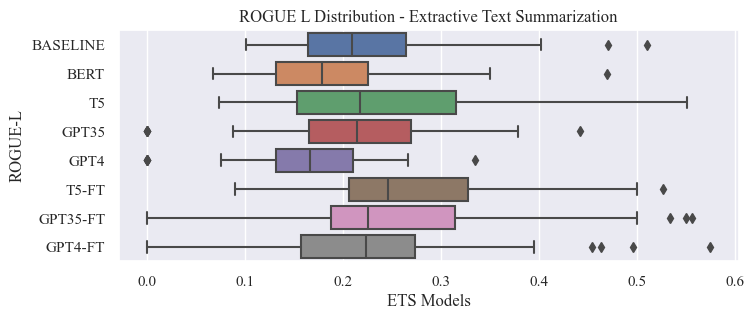

In [12]:
cols = ['baseline-ext-RL','bert-base-ext-zs-RL', 't5-small-ext-zs-RL', 'gpt-3.5-ext-zs-RL', 'gpt-4-ext-zs-RL', 
        'bert-base-ext-ft-RL', 'gpt35-ext-ft-RL', 'gpt40-ext-ft-RL']
rougeL = mdf[cols]
rougeL.rename(columns={
                'baseline-ext-RL': 'BASELINE', 
                'bert-base-ext-zs-RL': 'BERT', 
                't5-small-ext-zs-RL': 'T5', 
                'gpt-3.5-ext-zs-RL': 'GPT35', 
                'gpt-4-ext-zs-RL': 'GPT4', 
                'bert-base-ext-ft-RL': 'T5-FT', 
                'gpt35-ext-ft-RL': 'GPT35-FT', 
                'gpt40-ext-ft-RL': 'GPT4-FT'}, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rougeL), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ETS Models')
plt.ylabel('ROGUE-L')
plt.title('ROGUE L Distribution - Extractive Text Summarization', fontsize=12)
plt.show()

# Analysis of Abstractive Text Summarization

### Distribution of Individual ROGUE scores - Box Plot Visualization

In [13]:
df = pd.read_csv('./output/abs-ts-final.csv')
df = df.dropna(how='any',axis=0) 
df = df.fillna('')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,highlights,article,baseline-abs,bert-base-abs-zs,t5-small-abs-zs,gpt-3.5-abs-zs,gpt-4-abs-zs,bert-base-abs-ft,t5-small-abs-ft,article_len,highlights_len,gpt-3.5-abs-ft,gpt-4-abs-ft
0,0,0,92c514c913c0bdfe25341af9fd72b29db544099b,Experts question if packed out planes are put...,Ever noticed how plane seats appear to be gett...,police say they are not to be a new police say...,ever noticed how plane seats appear to be gett...,some experts are questioning if shrinking spac...,Experts are concerned that the shrinking space...,Experts are raising concerns that the decreasi...,the dot and faa are happy to set standards for...,A U.S consumer advisory group set up by the De...,374,36,Experts are concerned that the shrinking space...,Experts are warning that the decreasing space ...
2,2,2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Nottingham Forest are close to extending Dougi...,Dougie Freedman is on the verge of agreeing a ...,the new york s office says the new york is the...,dougie freedman is on the verge of agreeing a ...,Dougie Freedman is set to sign a new two year ...,Dougie Freedman is close to signing a new two-...,Dougie Freedman is close to signing a new two-...,dougie freedman is set to sign a new two year ...,Dougie Freedman is set to sign a new two year ...,114,35,"Nottingham Forest's manager, Dougie Freedman, ...",Dougie Freedman is close to signing a new two-...
3,3,3,caabf9cbdf96eb1410295a673e953d304391bfbb,Fiorentina goalkeeper Neto has been linked wit...,Liverpool target Neto is also wanted by PSG an...,the man is a new york city of the city of the ...,liverpool target neto is also wanted by psg an...,neto is wanted by a number of top european clu...,Liverpool faces competition from PSG and Spani...,Liverpool is interested in signing Fiorentina ...,liverpool and psg were linked with a move for ...,Liverpool target Neto is also wanted by PSG an...,316,44,Liverpool face competition from PSG and Spanis...,"Liverpool, along with PSG and top clubs in Spa..."
4,4,4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,"Tell-all interview with the reality TV star, 6...",Bruce Jenner will break his silence in a two h...,the woman s mother says the girl s mother says...,bruce jenner will break his silence in a two h...,the former Olympian will speak in a two hour i...,"Bruce Jenner, the former Olympian and reality ...",Bruce Jenner will discuss his life in a two-ho...,the interview comes amid growing speculation a...,The former Olympian and reality TV star 65 wil...,780,61,Former Olympian and reality TV star Bruce Jenn...,Bruce Jenner is set to have a comprehensive in...
5,5,5,5ed5e3fbd235a8046cd3b87f4a1aa51b856c8ec3,Giant pig fell into the swimming pool at his h...,This is the moment that a crew of firefighters...,police say they were not to be a new york poli...,this is the moment that a crew of firefighters...,the prize porker known as Pigwig had fallen in...,A team from Dorset Fire and Rescue had to resc...,A crew of firefighters faced a challenging tas...,the prize porker known as pigwig had fallen in...,The prize porker known as Pigwig had fallen in...,397,46,A team from Dorset Fire and Rescue had to resc...,Firefighters from Dorset Fire and Rescue Servi...


In [14]:
mdf = pd.DataFrame()

models = ['baseline-abs', 'bert-base-abs-zs', 't5-small-abs-zs', 'gpt-3.5-abs-zs', 'gpt-4-abs-zs', 
          'bert-base-abs-ft', 't5-small-abs-ft', 'gpt-3.5-abs-ft', 'gpt-4-abs-ft']
for model in models:
    metrics = []
    for index, row in df.iterrows():
        preds = row[model]
        ref = row['highlights']
        rogue_score = rouge.compute(predictions=[preds], references=[ref])
        metrics.append(rogue_score)

    temp_df = pd.DataFrame(metrics)
    temp_df.drop('rougeLsum' , axis=1, inplace = True)
    temp_df.rename(columns = {'rouge1': model + '-' + 'R1', 
                              'rouge2': model + '-' + 'R2', 
                              "rougeL": model + '-' + 'RL'}, inplace = True) 
    mdf = pd.concat([mdf, temp_df], axis=1)
    print(model)


baseline-abs
bert-base-abs-zs
t5-small-abs-zs
gpt-3.5-abs-zs
gpt-4-abs-zs
bert-base-abs-ft
t5-small-abs-ft
gpt-3.5-abs-ft
gpt-4-abs-ft


In [15]:
mdf.to_csv('./output/ats-ts-boxplot-data.csv')
mdf.head(5)

,baseline-abs-R1,baseline-abs-R2,baseline-abs-RL,bert-base-abs-zs-R1,bert-base-abs-zs-R2,bert-base-abs-zs-RL,t5-small-abs-zs-R1,t5-small-abs-zs-R2,t5-small-abs-zs-RL,gpt-3.5-abs-zs-R1,...,bert-base-abs-ft-RL,t5-small-abs-ft-R1,t5-small-abs-ft-R2,t5-small-abs-ft-RL,gpt-3.5-abs-ft-R1,gpt-3.5-abs-ft-R2,gpt-3.5-abs-ft-RL,gpt-4-abs-ft-R1,gpt-4-abs-ft-R2,gpt-4-abs-ft-RL
0,0.052632,0.000000,0.052632,0.273810,0.120482,0.190476,0.272727,0.069767,0.204545,0.321839,...,0.152174,0.293578,0.112150,0.220183,0.390805,0.141176,0.321839,0.288889,0.090909,0.244444
1,0.117647,0.000000,0.117647,0.318841,0.102941,0.202899,0.422535,0.144928,0.253521,0.551724,...,0.295455,0.380952,0.098361,0.190476,0.578313,0.271605,0.385542,0.459770,0.188235,0.298851
2,0.048780,0.000000,0.048780,0.362319,0.147059,0.202899,0.463415,0.225000,0.268293,0.494382,...,0.333333,0.370370,0.177215,0.271605,0.377778,0.136364,0.200000,0.363636,0.116279,0.181818
3,0.183673,0.000000,0.122449,0.449438,0.250000,0.348315,0.440367,0.149533,0.238532,0.589286,...,0.335878,0.555556,0.290323,0.396825,0.548673,0.288288,0.353982,0.464286,0.200000,0.357143
4,0.296296,0.050633,0.148148,0.297030,0.120000,0.168317,0.418605,0.071429,0.255814,0.432990,...,0.212766,0.396226,0.115385,0.264151,0.412371,0.189474,0.226804,0.456522,0.222222,0.326087


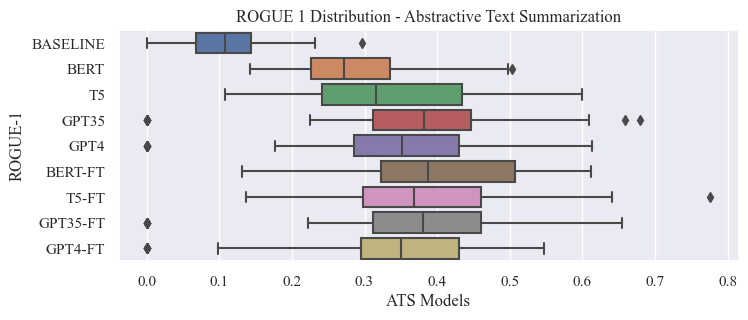

In [16]:
cols = ['baseline-abs-R1', 'bert-base-abs-zs-R1', 't5-small-abs-zs-R1', 'gpt-3.5-abs-zs-R1', 
        'gpt-4-abs-zs-R1', 'bert-base-abs-ft-R1', 't5-small-abs-ft-R1', 'gpt-3.5-abs-ft-R1', 'gpt-4-abs-ft-R1']
rouge1 = mdf[cols]
rouge1.rename(columns={
                'baseline-abs-R1': 'BASELINE', 
                'bert-base-abs-zs-R1': 'BERT', 
                't5-small-abs-zs-R1': 'T5', 
                'gpt-3.5-abs-zs-R1': 'GPT35', 
                'gpt-4-abs-zs-R1': 'GPT4', 
                'bert-base-abs-ft-R1': 'BERT-FT', 
                't5-small-abs-ft-R1': 'T5-FT', 
                'gpt-3.5-abs-ft-R1': 'GPT35-FT',
                'gpt-4-abs-ft-R1': 'GPT4-FT'}, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rouge1), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ATS Models')
plt.ylabel('ROGUE-1')
plt.title('ROGUE 1 Distribution - Abstractive Text Summarization', fontsize=12)
plt.show()

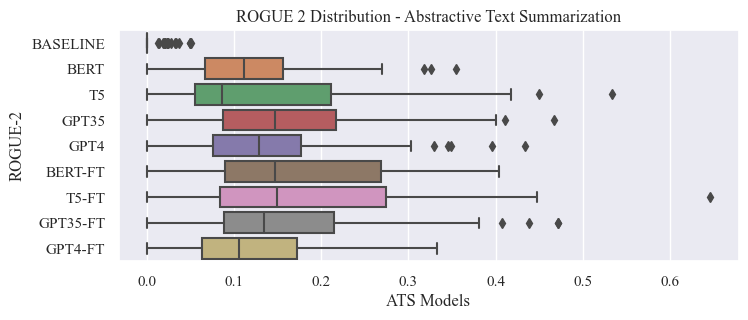

In [17]:
cols = ['baseline-abs-R2', 'bert-base-abs-zs-R2', 't5-small-abs-zs-R2', 'gpt-3.5-abs-zs-R2', 
        'gpt-4-abs-zs-R2', 'bert-base-abs-ft-R2', 't5-small-abs-ft-R2', 'gpt-3.5-abs-ft-R2', 'gpt-4-abs-ft-R2']
rouge2 = mdf[cols]
rouge2.rename(columns={
                'baseline-abs-R2': 'BASELINE', 
                'bert-base-abs-zs-R2': 'BERT', 
                't5-small-abs-zs-R2': 'T5', 
                'gpt-3.5-abs-zs-R2': 'GPT35', 
                'gpt-4-abs-zs-R2': 'GPT4', 
                'bert-base-abs-ft-R2': 'BERT-FT', 
                't5-small-abs-ft-R2': 'T5-FT', 
                'gpt-3.5-abs-ft-R2': 'GPT35-FT',
                'gpt-4-abs-ft-R2': 'GPT4-FT'}, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rouge2), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ATS Models')
plt.ylabel('ROGUE-2')
plt.title('ROGUE 2 Distribution - Abstractive Text Summarization', fontsize=12)
plt.show()

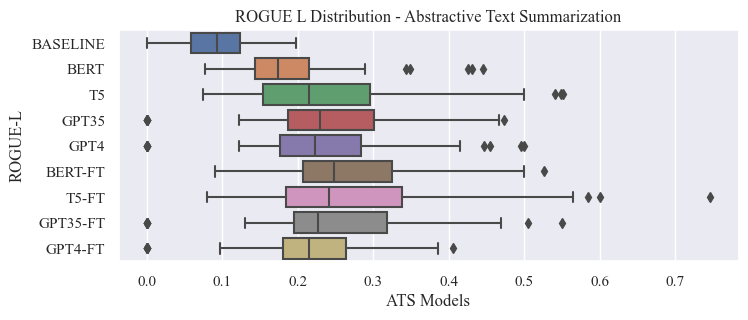

In [18]:
cols = ['baseline-abs-RL', 'bert-base-abs-zs-RL', 't5-small-abs-zs-RL', 'gpt-3.5-abs-zs-RL', 'gpt-4-abs-zs-RL',
        'bert-base-abs-ft-RL', 't5-small-abs-ft-RL', 'gpt-3.5-abs-ft-RL', 'gpt-4-abs-ft-RL']
rougeL = mdf[cols]
rougeL.rename(columns={
                'baseline-abs-RL': 'BASELINE', 
                'bert-base-abs-zs-RL': 'BERT', 
                't5-small-abs-zs-RL': 'T5', 
                'gpt-3.5-abs-zs-RL': 'GPT35', 
                'gpt-4-abs-zs-RL': 'GPT4', 
                'bert-base-abs-ft-RL': 'BERT-FT', 
                't5-small-abs-ft-RL': 'T5-FT', 
                'gpt-3.5-abs-ft-RL': 'GPT35-FT',
                'gpt-4-abs-ft-RL': 'GPT4-FT'}, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rougeL), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ATS Models')
plt.ylabel('ROGUE-L')
plt.title('ROGUE L Distribution - Abstractive Text Summarization', fontsize=12)
plt.show()

# Analysis of Hybrid Text Summarization

### Distribution of Individual ROGUE scores - Box Plot Visualization

In [19]:
df = pd.read_csv('./output/hyb-ts-final.csv')
df = df.dropna(how='any',axis=0) 
df = df.fillna('')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,highlights,article,baseline-hyb,bert-hyb,t5-hyb,article_len,highlights_len,gpt35-hyb,gpt4-hyb
0,0,0,92c514c913c0bdfe25341af9fd72b29db544099b,Experts question if packed out planes are put...,Ever noticed how plane seats appear to be gett...,ever noticed how plane seats appear to be gett...,the department of transportation is happy to s...,The shrinking space on aeroplanes is not only ...,374,36,Experts are concerned that the shrinking space...,Experts are raising concerns that the decreasi...
2,2,2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Nottingham Forest are close to extending Dougi...,Dougie Freedman is on the verge of agreeing a ...,dougie freedman is on the verge of agreeing a ...,dougie freedman is set to sign a new two year ...,Dougie Freedman is set to sign a new two year ...,114,35,Dougie Freedman is set to sign a new two-year ...,Dougie Freedman is close to signing a new two-...
3,3,3,caabf9cbdf96eb1410295a673e953d304391bfbb,Fiorentina goalkeeper Neto has been linked wit...,Liverpool target Neto is also wanted by PSG an...,liverpool target neto is also wanted by psg an...,liverpool were linked with a move for the 25 -...,Liverpool target Neto is also wanted by PSG an...,316,44,Liverpool face competition from PSG and Spanis...,"Liverpool, PSG, and Spanish clubs are interest..."
4,4,4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,"Tell-all interview with the reality TV star, 6...",Bruce Jenner will break his silence in a two h...,bruce jenner will break his silence in a two h...,the interview comes amid growing speculation a...,The former Olympian will speak in a two hour i...,780,61,"Bruce Jenner, former Olympian and reality TV s...",Bruce Jenner will discuss his transition to a ...
5,5,5,5ed5e3fbd235a8046cd3b87f4a1aa51b856c8ec3,Giant pig fell into the swimming pool at his h...,This is the moment that a crew of firefighters...,this is the moment that a crew of firefighters...,the prize porker known as pigwig fell into the...,Pigwig had fallen into the pool in Ringwood Ha...,397,46,"A crew of firefighters in Ringwood, Hampshire,...",Firefighters worked to rescue a giant pig name...


In [20]:
import evaluate
rouge = evaluate.load('rouge')
df = df.reset_index()  # make sure indexes pair with number of rows

In [21]:
mdf = pd.DataFrame()
models = ['baseline-hyb', 'bert-hyb', 't5-hyb','gpt35-hyb','gpt4-hyb']

for model in models:
    metrics = []
    for index, row in df.iterrows():
        preds = row[model]
        ref = row['highlights']
        rogue_score = rouge.compute(predictions=[preds], references=[ref])
        metrics.append(rogue_score)

    temp_df = pd.DataFrame(metrics)
    temp_df.drop('rougeLsum' , axis=1, inplace = True)
    temp_df.rename(columns = {'rouge1': model + '-' + 'R1', 
                              'rouge2': model + '-' + 'R2', 
                              "rougeL": model + '-' + 'RL'}, inplace = True) 
    mdf = pd.concat([mdf, temp_df], axis=1)
    print(model)

mdf.to_csv('./output/hyb-ts-boxplot-data.csv')
mdf.head(5)

baseline-hyb
bert-hyb
t5-hyb
gpt35-hyb
gpt4-hyb


,baseline-hyb-R1,baseline-hyb-R2,baseline-hyb-RL,bert-hyb-R1,bert-hyb-R2,bert-hyb-RL,t5-hyb-R1,t5-hyb-R2,t5-hyb-RL,gpt35-hyb-R1,gpt35-hyb-R2,gpt35-hyb-RL,gpt4-hyb-R1,gpt4-hyb-R2,gpt4-hyb-RL
0,0.208696,0.087719,0.139130,0.285714,0.127273,0.196429,0.247191,0.114943,0.179775,0.314607,0.137931,0.247191,0.321839,0.141176,0.275862
1,0.259740,0.065789,0.142857,0.400000,0.120482,0.211765,0.380952,0.098361,0.190476,0.485714,0.147059,0.257143,0.470588,0.181818,0.264706
2,0.293785,0.114286,0.169492,0.533333,0.250000,0.355556,0.459459,0.222222,0.324324,0.418605,0.166667,0.232558,0.415584,0.213333,0.259740
3,0.467836,0.260355,0.362573,0.558559,0.311927,0.324324,0.471910,0.206897,0.247191,0.486486,0.256881,0.306306,0.473118,0.329670,0.408602
4,0.331288,0.136646,0.196319,0.478261,0.200000,0.326087,0.388889,0.114286,0.250000,0.479167,0.148936,0.187500,0.410959,0.197183,0.246575


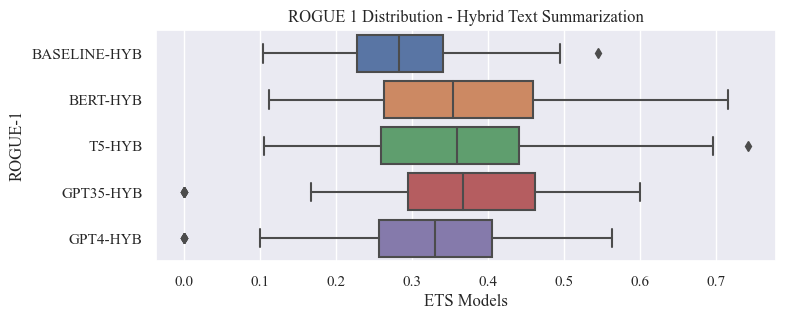

In [22]:
cols = ['baseline-hyb-R1', 'bert-hyb-R1', 't5-hyb-R1','gpt35-hyb-R1','gpt4-hyb-R1']
rouge1 = mdf[cols]
rouge1.rename(columns={
                'baseline-hyb-R1': 'BASELINE-HYB', 
                'bert-hyb-R1': 'BERT-HYB', 
                't5-hyb-R1': 'T5-HYB', 
                'gpt35-hyb-R1': 'GPT35-HYB', 
                'gpt4-hyb-R1': 'GPT4-HYB' }, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rouge1), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ETS Models')
plt.ylabel('ROGUE-1')
plt.title('ROGUE 1 Distribution - Hybrid Text Summarization', fontsize=12)
plt.show()

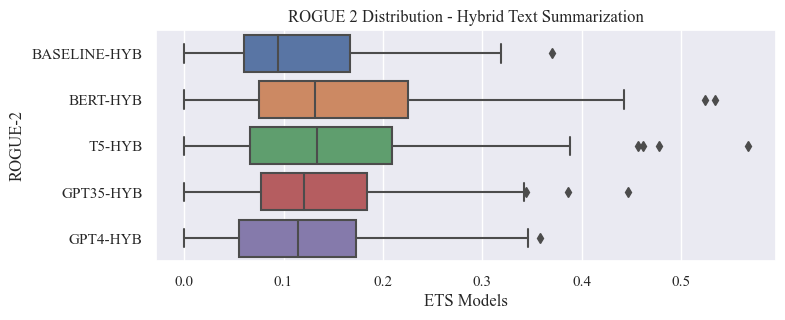

In [23]:
cols = ['baseline-hyb-R2', 'bert-hyb-R2', 't5-hyb-R2','gpt35-hyb-R2','gpt4-hyb-R2']
rouge2 = mdf[cols]
rouge2.rename(columns={
                'baseline-hyb-R2': 'BASELINE-HYB', 
                'bert-hyb-R2': 'BERT-HYB', 
                't5-hyb-R2': 'T5-HYB', 
                'gpt35-hyb-R2': 'GPT35-HYB', 
                'gpt4-hyb-R2': 'GPT4-HYB' }, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rouge2), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ETS Models')
plt.ylabel('ROGUE-2')
plt.title('ROGUE 2 Distribution - Hybrid Text Summarization', fontsize=12)
plt.show()

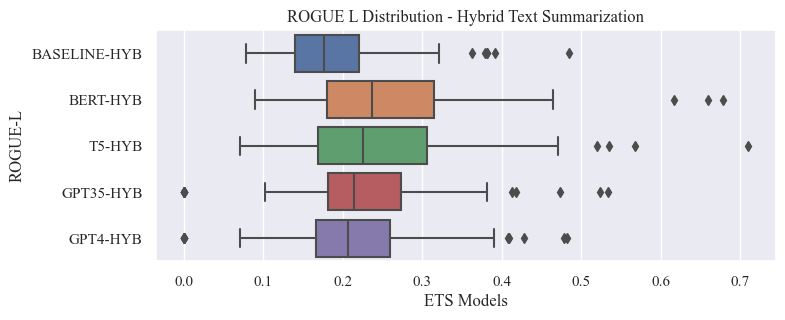

In [24]:
cols = ['baseline-hyb-RL', 'bert-hyb-RL', 't5-hyb-RL','gpt35-hyb-RL','gpt4-hyb-RL']
rougeL = mdf[cols]
rougeL.rename(columns={
                'baseline-hyb-RL': 'BASELINE-HYB', 
                'bert-hyb-RL': 'BERT-HYB', 
                't5-hyb-RL': 'T5-HYB', 
                'gpt35-hyb-RL': 'GPT35-HYB', 
                'gpt4-hyb-RL': 'GPT4-HYB' }, inplace=True)
sns.boxplot(x="value", y="variable", data=pd.melt(rougeL), orient='h')
sns.set(rc={"figure.figsize":(8, 3)})
sns.set(font="Times New Roman")
plt.xlabel('ETS Models')
plt.ylabel('ROGUE-L')
plt.title('ROGUE L Distribution - Hybrid Text Summarization', fontsize=12)
plt.show()